# Titanic

In [71]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# read csv
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

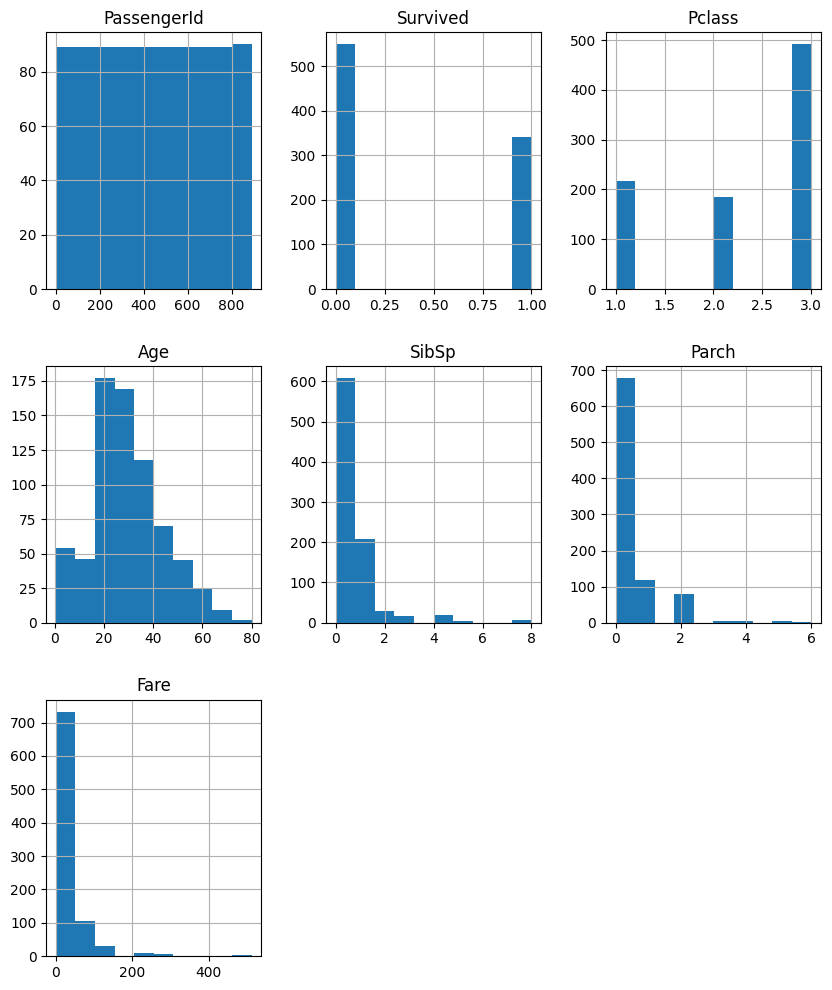

In [77]:
df.hist(figsize=(10,12))

In [78]:
df = df.drop(columns=['PassengerId','Name'])

In [79]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

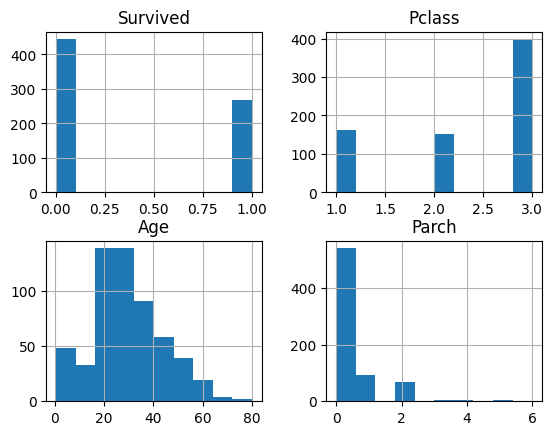

In [80]:
train_set[['Survived','Pclass','Age','Parch']].hist()

In [81]:
corr_matrix = train_set[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.246641
Parch       0.078311
SibSp      -0.047602
Age        -0.059695
Pclass     -0.321750
Name: Survived, dtype: float64

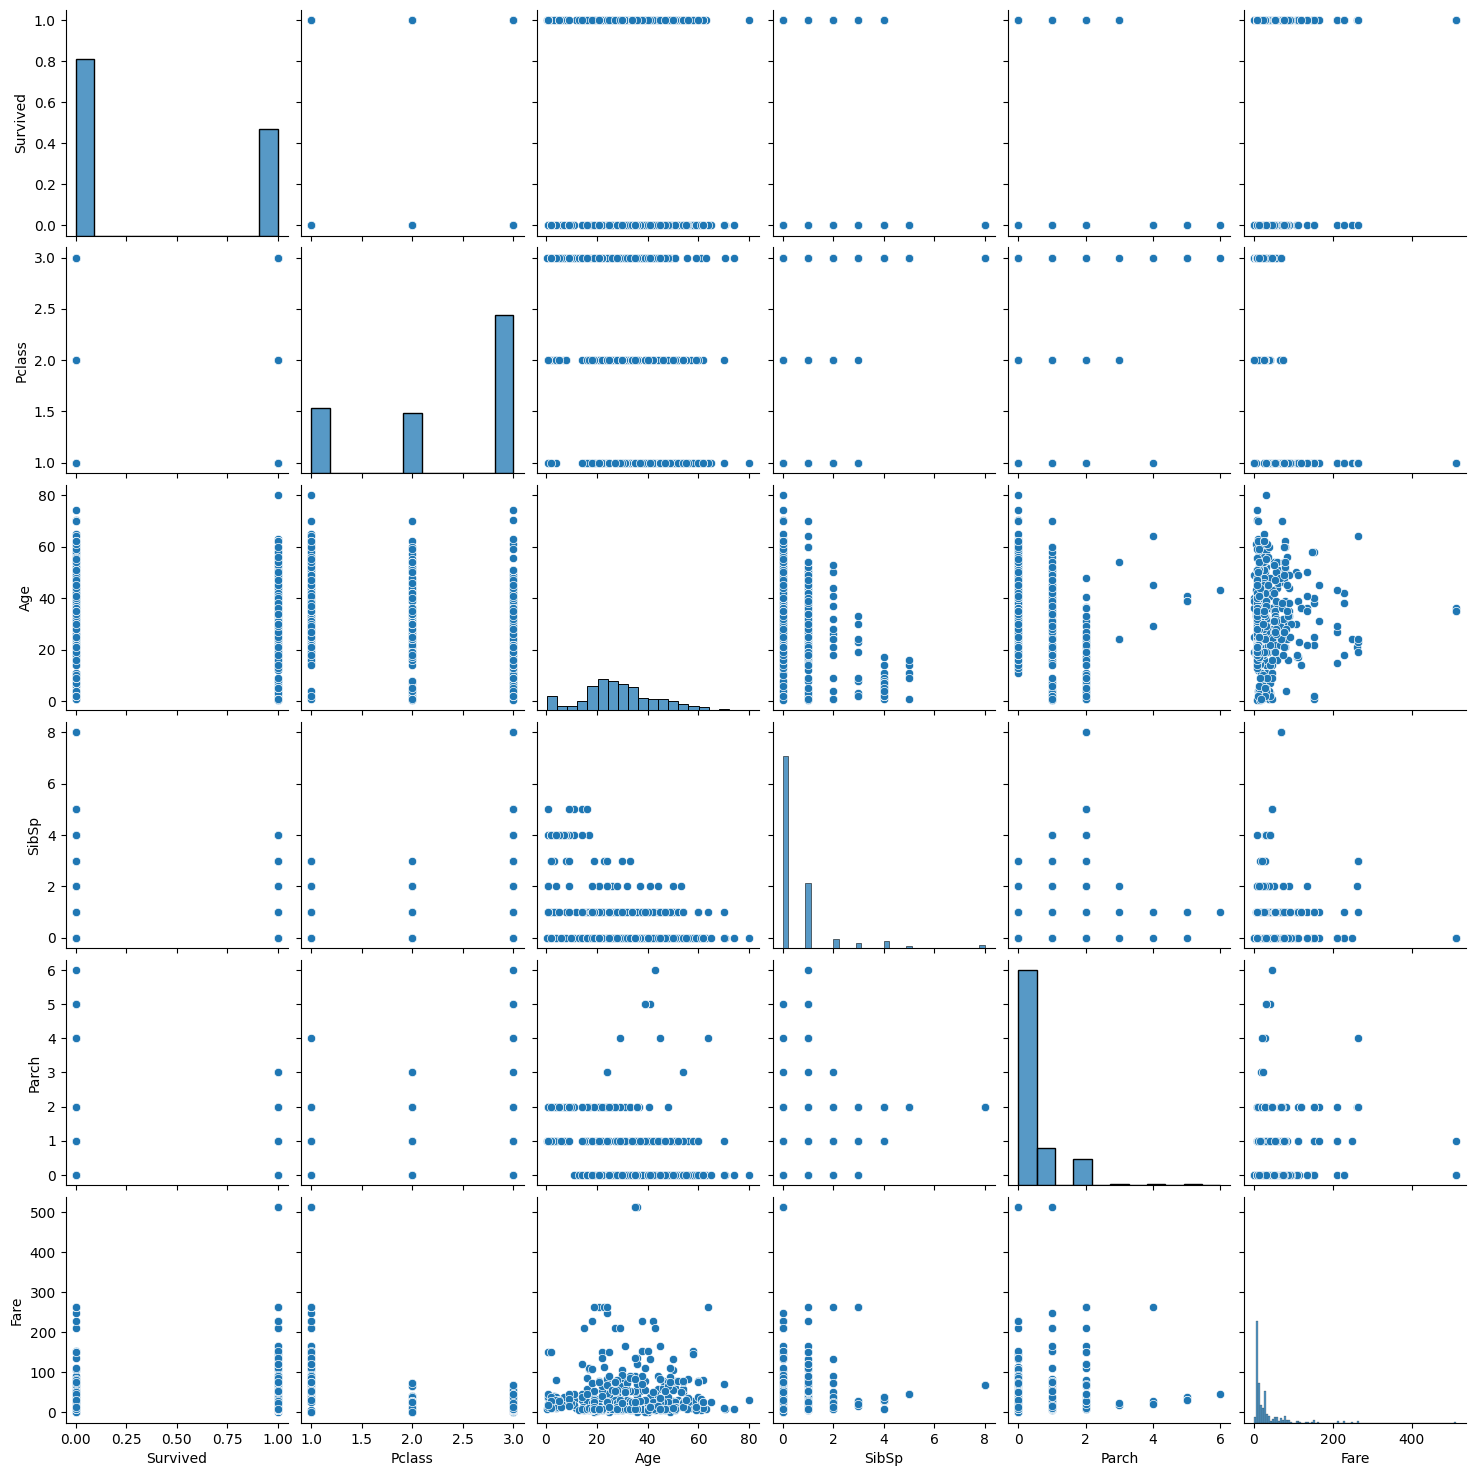

In [82]:
sns.pairplot(train_set)
plt.show()

In [83]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [84]:
train_set.drop(columns=["Cabin",'Ticket'],axis=1,inplace=True)
test_set.drop(columns=["Cabin",'Ticket'],axis=1,inplace=True)

In [85]:
train_set.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [86]:
test_set.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         37
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [87]:
train_set.dropna(subset=['Embarked'],inplace=True)
train_set.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [88]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  710 non-null    int64  
 1   Pclass    710 non-null    int64  
 2   Sex       710 non-null    object 
 3   Age       570 non-null    float64
 4   SibSp     710 non-null    int64  
 5   Parch     710 non-null    int64  
 6   Fare      710 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


In [89]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [90]:
from sklearn.pipeline import make_pipeline

age_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
sex_pipeline = make_pipeline(OrdinalEncoder())

In [91]:
preprocessing = ColumnTransformer([
    ('age', age_pipeline, ['Age']),
    ('num', num_pipeline, ['Pclass', 'Fare', 'SibSp', 'Parch']),
    ('cat', cat_pipeline, ['Embarked']),
    ('sex', sex_pipeline, ['Sex'])
])

X = train_set.drop(columns=['Survived'],axis=1)
y = train_set['Survived']

pd.DataFrame(preprocessing.fit_transform(X),
              columns=preprocessing.get_feature_names_out(),
              index=X.index).head()

,age__Age,num__Pclass,num__Fare,num__SibSp,num__Parch,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,sex__Sex
331,1.262456,-1.622372,-0.076094,-0.471532,-0.480172,0.0,0.0,1.0,1.0
733,-0.474396,-0.406021,-0.374487,-0.471532,-0.480172,0.0,0.0,1.0,1.0
382,0.220345,0.810330,-0.472186,-0.471532,-0.480172,0.0,0.0,1.0,1.0
704,-0.242816,0.810330,-0.473549,0.378183,-0.480172,0.0,0.0,1.0,1.0
813,-1.786684,0.810330,-0.022672,2.927329,2.045176,0.0,0.0,1.0,0.0


In [92]:
log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked']),
                                                 ('sex',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Sex'])])),
                ('logisticregression', LogisticRegression())])

In [93]:
pred_train = log_reg.predict(X)
pred_test =  log_reg.predict(test_set.drop(columns=['Survived'],axis=1))

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

print(" Classification Report for the test group : \n")
print(classification_report(test_set['Survived'],pred_test),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(y,pred_train),"\n\n")

 Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       444
           1       0.76      0.69      0.72       266

    accuracy                           0.80       710
   macro avg       0.79      0.78      0.78       710
weighted avg       0.80      0.80      0.80       710
 




[[90 15]
 [19 55]]


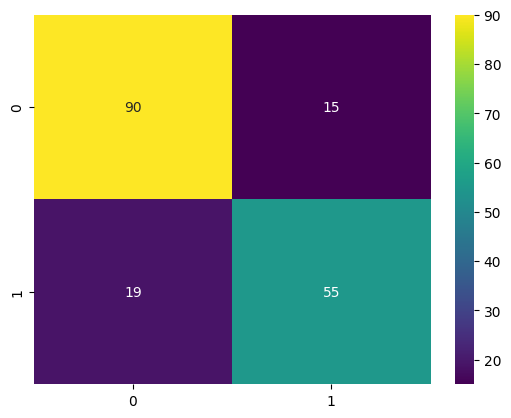

In [95]:
CM_RFC=confusion_matrix(test_set['Survived'],pred_test)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="viridis")
plt.show()